# Import Libraries and connect to drive

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import numpy as np

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Load the dataset
csv_path = '/content/gdrive/MyDrive/MemeDataset/images_description.csv'
image_dir = '/content/gdrive/MyDrive/MemeDataset/images'

df = pd.read_csv(csv_path)
print(f"Dataset size: {len(df)}")
print(df.head())


Mounted at /content/gdrive
Dataset size: 4848
              image_name                                           Captions  \
0            fb 1425.jpg  বিজেপি লিডার: *আমরা ফ্যাসিবাদী না।* বিজেপি সরক...   
1             in 444.jpg  বিজয়া সম্মিলনীর মোড়কে পার্থ-কাণ্ডের 'ড্যামেজ ...   
2   ovodro_img (338).jpg                           হিংস্র বাঘ সেক্সি বাঘিনী   
3            fb 1744.jpg  সরকারি চাকরি করা কাকুর যখন আধাঘন্টা ধরে দার কর...   
4  bangla-troll (21).jpg           হ্যা বাবা মার মার এইভাবে কামড় মারতে হয় !   

                  Label  
0  political aggression  
1  political aggression  
2   gendered aggression  
3   gendered aggression  
4        non-aggressive  


In [3]:
# Load the dataset
csv_path = '/content/gdrive/MyDrive/MemeDataset/images_description.csv'
image_dir = '/content/gdrive/MyDrive/MemeDataset/images'

df = pd.read_csv(csv_path)

## 1. Basic Dataset Overview
print("=== Dataset Overview ===")
print(f"Total samples: {len(df)}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())

=== Dataset Overview ===
Total samples: 4848
Columns: ['image_name', 'Captions', 'Label']

First 5 rows:
              image_name                                           Captions  \
0            fb 1425.jpg  বিজেপি লিডার: *আমরা ফ্যাসিবাদী না।* বিজেপি সরক...   
1             in 444.jpg  বিজয়া সম্মিলনীর মোড়কে পার্থ-কাণ্ডের 'ড্যামেজ ...   
2   ovodro_img (338).jpg                           হিংস্র বাঘ সেক্সি বাঘিনী   
3            fb 1744.jpg  সরকারি চাকরি করা কাকুর যখন আধাঘন্টা ধরে দার কর...   
4  bangla-troll (21).jpg           হ্যা বাবা মার মার এইভাবে কামড় মারতে হয় !   

                  Label  
0  political aggression  
1  political aggression  
2   gendered aggression  
3   gendered aggression  
4        non-aggressive  

=== Missing Values ===
image_name    0
Captions      0
Label         0
dtype: int64


# 2. Label Distribution Analysis

<ipython-input-4-0ff333a3af03>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 50, f"{v}\n({label_percent[i]:.1f}%)", ha='center', fontsize=12)


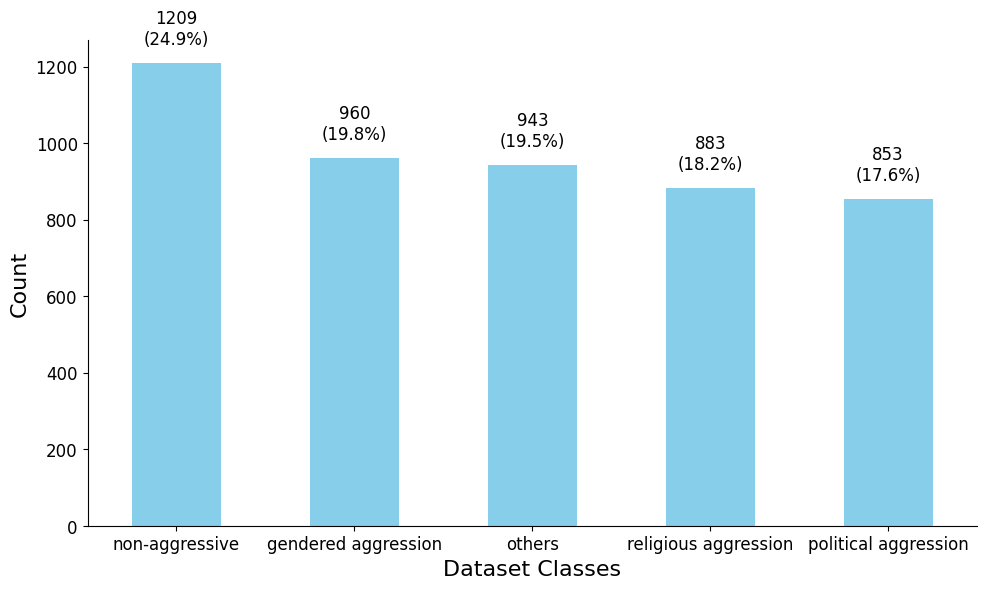

In [4]:
plt.figure(figsize=(10, 6))
label_counts = df['Label'].value_counts()
label_percent = df['Label'].value_counts(normalize=True) * 100

ax = label_counts.plot(kind='bar', fontsize=12, color='skyblue')
#plt.title('Distribution of Dataset Classes', fontsize=18)
plt.xlabel('Dataset Classes', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=0)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Keep only the bottom and left spines (axes)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

for i, v in enumerate(label_counts):
    ax.text(i, v + 50, f"{v}\n({label_percent[i]:.1f}%)", ha='center', fontsize=12)
plt.tight_layout()
plt.show()

# Caption length analysis

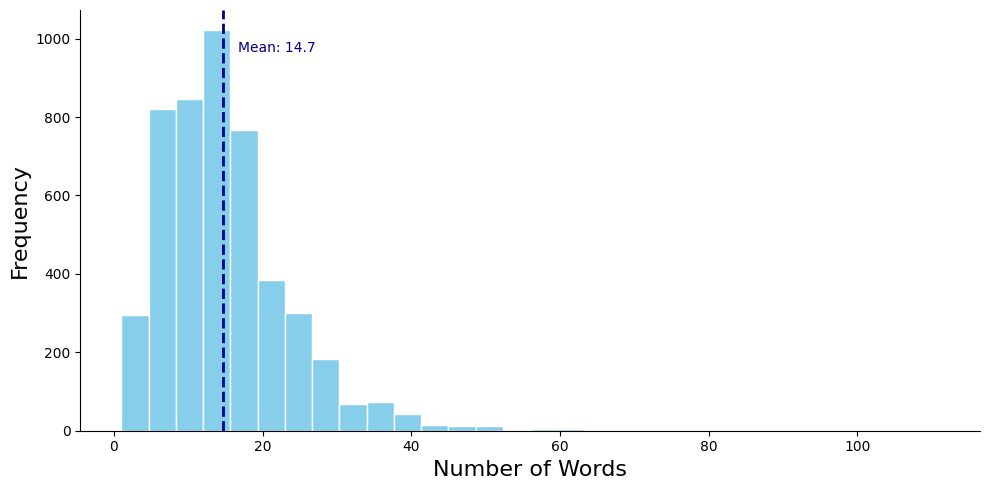

In [ ]:
df['caption_length'] = df['Captions'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 5))
plt.hist(df['caption_length'], bins=30, color='skyblue', edgecolor='white')
#plt.title('Distribution of Caption Length (in words)', fontsize=16)
plt.xlabel('Number of Words', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Keep bottom and left spines (x and y axes)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.axvline(df['caption_length'].mean(), color='darkblue', linestyle='dashed', linewidth=2)
plt.text(df['caption_length'].mean()+2, plt.ylim()[1]*0.9,
         f'Mean: {df["caption_length"].mean():.1f}', color='darkblue')
plt.tight_layout()
plt.show()

# Caption Length Distribution by Label

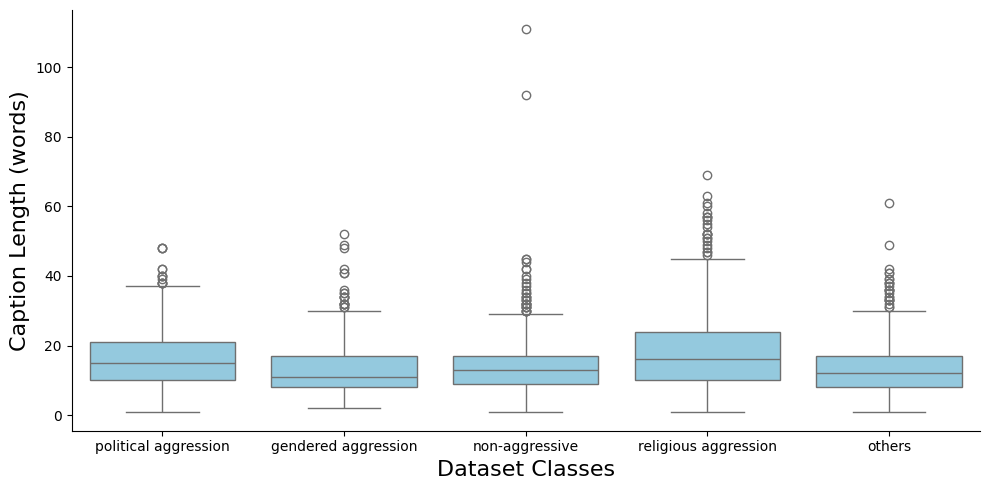

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Label', y='caption_length', data=df, color='skyblue')

# Remove top and right spines (box borders)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Keep bottom and left spines (x and y axes)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

#plt.title('Caption Length Distribution by Label', fontsize=16)
plt.xlabel('Dataset Classes', fontsize=16)
plt.ylabel('Caption Length (words)', fontsize=16)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 5. Text Analysis - Word Frequency

In [5]:
!pip install bnlp bangla

  Preparing metadata (setup.py) ... done
  Created wheel for bnlp: filename=bnlp-0.8-py3-none-any.whl size=32802 sha256=ae2d7fdc7c8f0a5ca4da75eae2c0db6603fa56958dc4ba2b7f5d2c6ac62d8575
  Stored in directory: /root/.cache/pip/wheels/23/2a/c7/f17cc895ad4feeab04f10a3cf815ab7a7cb2053b53dc47c68a
Successfully built bnlp


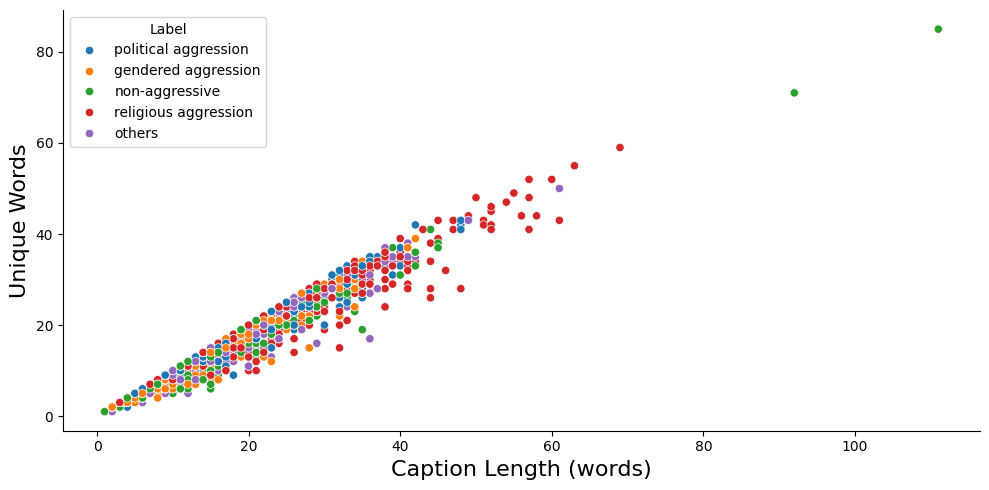

In [ ]:
df['unique_words'] = df['Captions'].apply(lambda x: len(set(str(x).split())))

plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x='caption_length', y='unique_words', hue='Label',  data=df, color='skyblue')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Keep bottom and left spines (x and y axes)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

#plt.title('Unique Words vs Caption Length', fontsize=16)
plt.xlabel('Caption Length (words)', fontsize=16)
plt.ylabel('Unique Words', fontsize=16)
plt.legend(title='Label')
plt.tight_layout()
plt.show()

In [ ]:
!pip install nltk

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
<ipython-input-74-1f00ae70b7a8>:37: UserWarning: Glyph 2453 (\N{BENGALI LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-74-1f00ae70b7a8>:37: UserWarning: Matplotlib currently does not support Bengali natively.
  plt.tight_layout()
<ipython-input-74-1f00ae70b7a8>:37: UserWarning: Glyph 2503 (\N{BENGALI VOWEL SIGN E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-74-1f00ae70b7a8>:37: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-74-1f00ae70b7a8>:37: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-74-1f00ae70b7a8>:37: UserWarning: Glyph 2438 (\N{BENGALI LETTER AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-74-1f00ae70b7a8>:37: UserWarning: Glyp

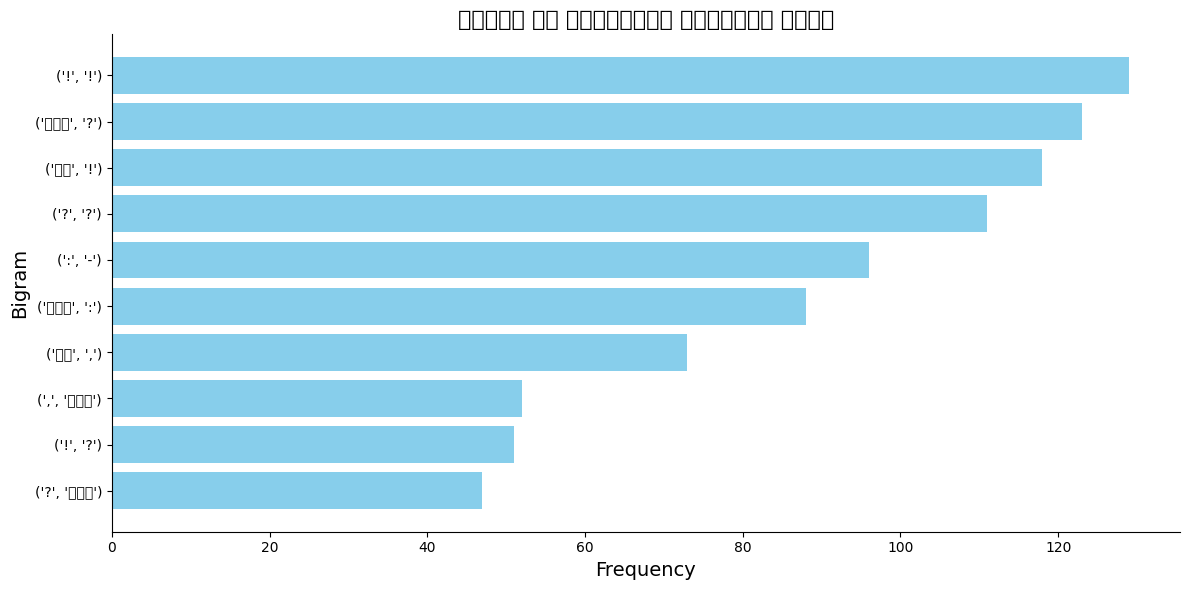

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from nltk.util import ngrams
from collections import Counter
import nltk

# Set a Bengali-compatible font (Windows)
plt.rcParams['font.family'] = 'Vrinda'  # Try 'Kalpurush' or 'Siyam Rupali' if available

# Download NLTK data
nltk.download('punkt_tab')

def get_top_ngrams(corpus, n=None, top=10):
    text = ' '.join(corpus)
    words = nltk.word_tokenize(text)
    n_grams = ngrams(words, n)
    return pd.DataFrame(Counter(n_grams).most_common(top), columns=['ngram', 'count'])

# Get bigrams
bigrams = get_top_ngrams(df['Captions'].astype(str), 2)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(bigrams['ngram'].astype(str), bigrams['count'], color='skyblue')

# Remove top/right borders (keep only x and y axes)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Labels & title
plt.title('শীর্ষ ২০ সর্বাধিক ব্যবহৃত শব্দ', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Bigram', fontsize=14)
plt.gca().invert_yaxis()  # Highest frequency at top

plt.tight_layout()
plt.show()

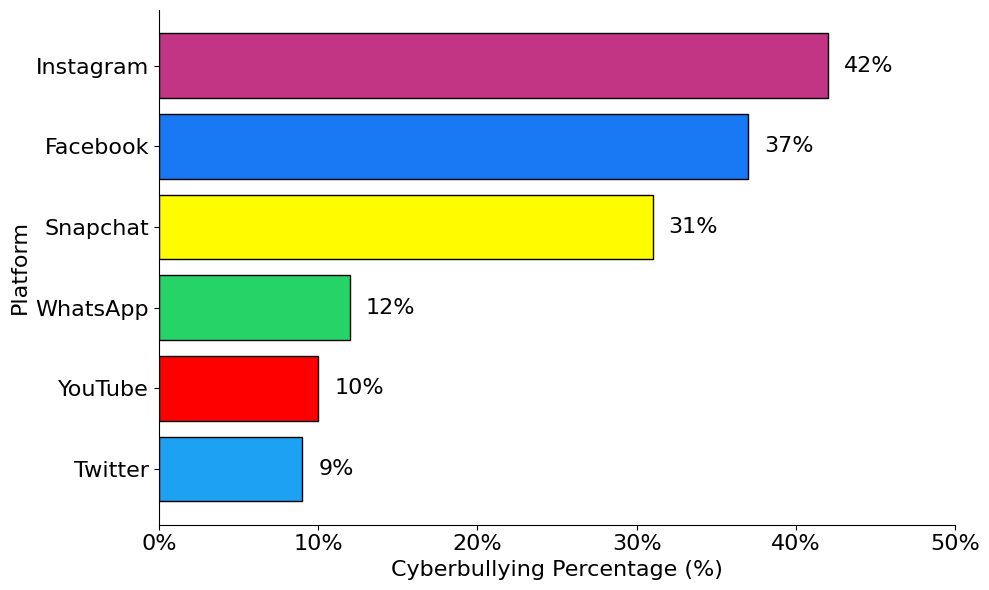

In [ ]:
import matplotlib.pyplot as plt

# Data
platforms = ['Twitter', 'YouTube', 'WhatsApp', 'Snapchat', 'Facebook', 'Instagram']
percentages = [9, 10, 12, 31, 37, 42]
colors = [
    '#1DA1F2',  # Twitter blue
    '#FF0000',   # YouTube red
    '#25D366',   # WhatsApp green
    '#FFFC00',   # Snapchat yellow
    '#1877F2',   # Facebook blue
    '#C13584'    # Instagram purple
]

# Create figure
plt.figure(figsize=(10, 6))

# Plot horizontal bars
bars = plt.barh(platforms, percentages, color=colors, edgecolor='black')

# Add percentage labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width}%', ha='left', va='center', fontsize=16)

# Customize axes
plt.xlim(0, 50)
plt.xticks([0, 10, 20, 30, 40, 50], ['0%', '10%', '20%', '30%', '40%', '50%'], fontsize=16)
plt.yticks(fontsize=16)  # This line increases the font size of the platform names
plt.xlabel('Cyberbullying Percentage (%)', fontsize=16)
plt.ylabel('Platform', fontsize=16)
#plt.title('Social Media Platform Usage', fontsize=16)

# Remove top and right borders (spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()